In [27]:
import pandas as pd
import numpy as np

In [28]:
train=pd.read_csv('train.csv')

In [29]:
train.head()

,Unnamed: 0,Unnamed: 0.1,DATE,WD,WS,TEP,HUM,pm2.5,year,weekday,month
0,0,0,2017/1/1,5,0.8,19.6,0.84,41.0,2017,6,1
1,1,1,2017/1/2,327,1.3,20.0,0.84,49.0,2017,0,1
2,2,2,2017/1/3,348,1.1,20.1,0.84,49.0,2017,1,1
3,3,3,2017/1/4,3,0.9,20.5,0.84,36.0,2017,2,1
4,4,4,2017/1/5,11,1.1,20.5,0.84,46.0,2017,3,1


In [30]:
test=pd.read_csv('Test.csv')

In [31]:
test.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,DATE,WD,WS,TEP,HUM,pm2.5,year,weekday,month
0,0,0,0,2019/1/1,342.0,1.3,17.5,0.87,31.0,2019,1,1
1,1,1,1,2019/1/2,349.0,1.3,18.1,0.90,53.0,2019,2,1
2,2,2,2,2019/1/3,21.0,1.5,19.0,0.95,40.0,2019,3,1
3,3,3,3,2019/1/4,273.0,1.4,20.2,0.92,20.0,2019,4,1
4,4,4,4,2019/1/5,332.0,1.4,21.5,0.87,23.0,2019,5,1


In [32]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
Unnamed: 0      730 non-null int64
Unnamed: 0.1    730 non-null int64
DATE            730 non-null object
WD              730 non-null int64
WS              730 non-null float64
TEP             730 non-null float64
HUM             730 non-null float64
pm2.5           730 non-null float64
year            730 non-null int64
weekday         730 non-null int64
month           730 non-null int64
dtypes: float64(4), int64(6), object(1)
memory usage: 62.9+ KB


In [33]:
Train_X=train[['WD','WS','TEP','HUM','year','weekday','month']].values
Train_Y=train[['pm2.5']].values

In [34]:
X_train=Train_X
y_train=Train_Y

In [35]:
Test_X=test[['WD','WS','TEP','HUM','year','weekday','month']].values
Test_Y=test[['pm2.5']].values

In [36]:
X_test=Test_X
y_test=Test_Y

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

C:\Users\jimmy\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [38]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                    rf.oob_score_,
                                                                                    rf.score(X_test, y_test)))

R^2 Training Score: 0.93 
OOB Score: 0.49 
R^2 Validation Score: 0.11


In [39]:
df_feature=['WD','WS','TEP','HUM','year','weekday','month']

In [40]:
rf.feature_importances_

array([0.10606433, 0.20310705, 0.37665139, 0.159771  , 0.02748484,
       0.04931762, 0.07760376])

In [42]:
# udfs ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [46]:
base_imp = imp_df(df_feature, rf.feature_importances_)
base_imp

,feature,feature_importance
0,TEP,0.376651
1,WS,0.203107
2,HUM,0.159771
3,WD,0.106064
4,month,0.077604
5,weekday,0.049318
6,year,0.027485


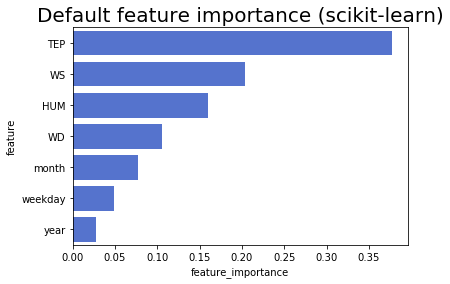

In [49]:
import sklearn
import pylab
# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

Text(0.5, 1, 'Correlation matrix')

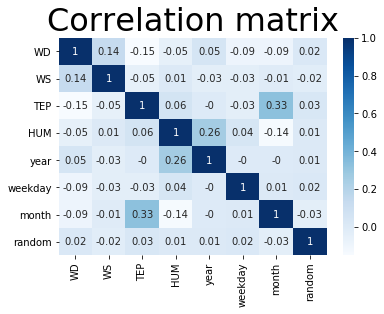

In [51]:
sns.heatmap(b.assign(target = a).corr().round(2), cmap = 'Blues', annot = True).set_title('Correlation matrix', fontsize = 32)

In [52]:
test_y_predicted = rf.predict(X_test)

In [53]:
 from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(y_test,test_y_predicted)

162.63245334210526

In [55]:
print('RMSE为：',np.sqrt(mean_squared_error(y_test,test_y_predicted)))

RMSE为： 12.75274297326286


In [57]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,test_y_predicted)

10.014013157894738